In [1]:
%run eval.ipynb
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from utils import eval, visual, save, save_model
from model import Model
import warnings
warnings.filterwarnings('ignore')

In [2]:

np.random.seed(42)
data = pd.read_csv('data/compound_feat4.csv').iloc[:,1:]
data['target'] = pd.qcut(data['label'], q=10, labels=False)
train_df, test_df = train_test_split(data, test_size=0.2, stratify=data['target'], random_state=43)


samples = train_df[train_df['label'] < 1.2]
train_df = pd.concat([train_df, samples], axis=0)
#train_df = pd.concat([train_df, samples], axis=0)
train_df = train_df.sample(frac=1).reset_index(drop=True)


train_df = train_df.drop(columns=['target'])
test_df = test_df.drop(columns=['target'])


X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1:].values
X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1:].values


print('train data:', X_train.shape)
print('X_test data:', X_test.shape)

train data: (240, 29)
X_test data: (48, 29)


# 1.DecisionTree_model

DecisionTree train: 
 r2: 1.0  rmse: 0.0  mse:0.0 error_ratio:0.0% mae:0.0
DecisionTree test: 
 r2: 0.814894552040377  rmse: 0.14737282653189493 mse:0.021718749999999995 error_ratio:8.8% mae:0.10312499999999998
save result successful！


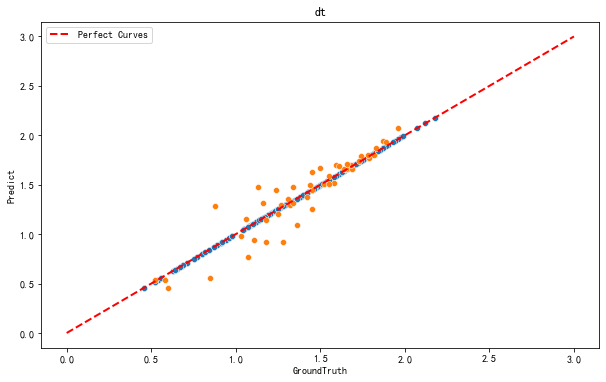

In [3]:

DecisionTree_model = DecisionTreeRegressor(random_state=25)


model = Model(DecisionTree_model, X_train, X_test, y_train, y_test, 'DecisionTree', '4')



visual(DecisionTree_model, 'dt', X_train, X_test, y_train, y_test)



DecisionTree_tuning train: 
 r2: 0.9774737022850205  rmse: 0.05848115199693735  mse:0.003420045138888889 error_ratio:2.46% mae:0.03341736111111112
DecisionTree_tuning test: 
 r2: 0.8220451599586287  rmse: 0.14449829241349763 mse:0.020879756510416663 error_ratio:8.76% mae:0.10373090277777773
save result successful！


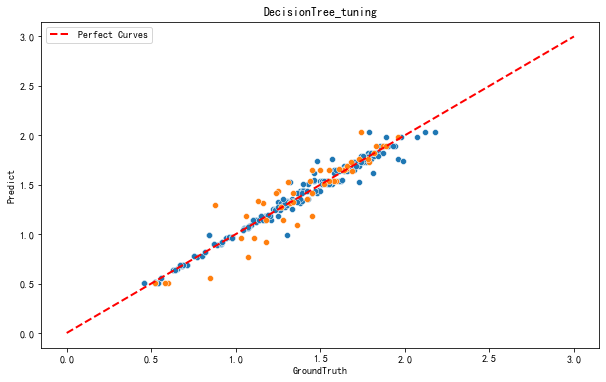

In [4]:
import numpy as np
from sklearn.model_selection import GridSearchCV


DT_param = {'max_depth':[3,5,7,9,10,11],
              'max_leaf_nodes':[25,30,40,50,60,70],
              'min_samples_leaf':[2,3,4,5,6,7,8],
}



D_model = DecisionTreeRegressor()
D_grid_search = GridSearchCV(D_model,DT_param,scoring='neg_mean_squared_error',cv=5)

model = Model(D_grid_search, X_train, X_test, y_train, y_test, 'DecisionTree_tuning', '4')

visual(model, 'DecisionTree_tuning', X_train, X_test, y_train, y_test)
    


# 2.RandomForest_model

RandomForest train: 
 r2: 0.9849428515259937  rmse: 0.04781260163387901  mse:0.0022860448750000096 error_ratio:2.11% mae:0.028052083333333547
RandomForest test: 
 r2: 0.879535918890965  rmse: 0.11888761061747923 mse:0.01413426395833336 error_ratio:6.99% mae:0.08510625000000023
save result successful！


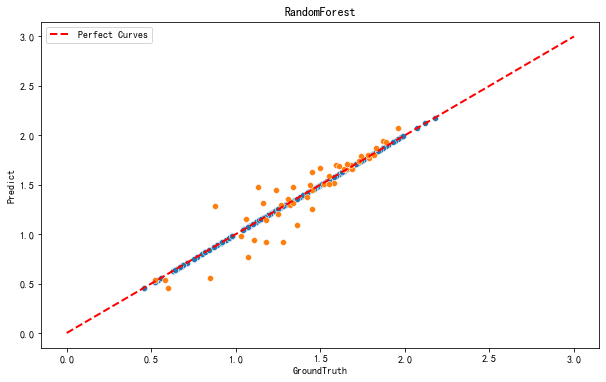

In [5]:

RandomForest_model =RandomForestRegressor(random_state=2024)  #n_estimators=300, max_depth=10, random_state=2023


model = Model(RandomForest_model, X_train, X_test, y_train, y_test, 'RandomForest', '4')



visual(DecisionTree_model, 'RandomForest', X_train, X_test, y_train, y_test)

RandomForest_tuning train: 
 r2: 0.9444625329557567  rmse: 0.09182565682135663  mse:0.00843195125067356 error_ratio:5.45% mae:0.06829236546827787
RandomForest_tuning test: 
 r2: 0.8457657740961547  rmse: 0.1345235103928177 mse:0.018096574848406537 error_ratio:8.14% mae:0.10347852131897654
save result successful！


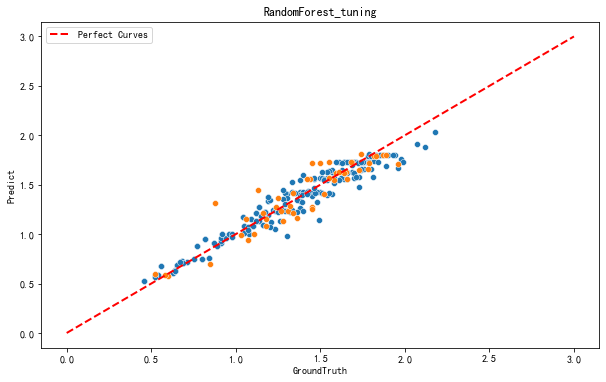

In [6]:


from sklearn.model_selection import GridSearchCV

rf_param = {
    'n_estimators': [300,400,500],
    'max_depth': [3,4,5],
#     'ccp_alpha': [0.0,0.05,0.1],
    'random_state': [2024]
}

rf_model = RandomForestRegressor(random_state=2024)

rf_grid_search = GridSearchCV(rf_model, rf_param, cv=5, scoring='neg_mean_squared_error')

model = Model(rf_grid_search, X_train, X_test, y_train, y_test, 'RandomForest_tuning', '4')

visual(model, 'RandomForest_tuning', X_train, X_test, y_train, y_test)

# 3. Linear_model

linear_reg train: 
 r2: 0.8959273119906894  rmse: 0.12570119173057018  mse:0.015800789602485567 error_ratio:8.3% mae:0.09638726647321952
linear_reg test: 
 r2: 0.8321356093516095  rmse: 0.1403418191938315 mse:0.0196958262146341 error_ratio:8.66% mae:0.11168730485494793
save result successful！


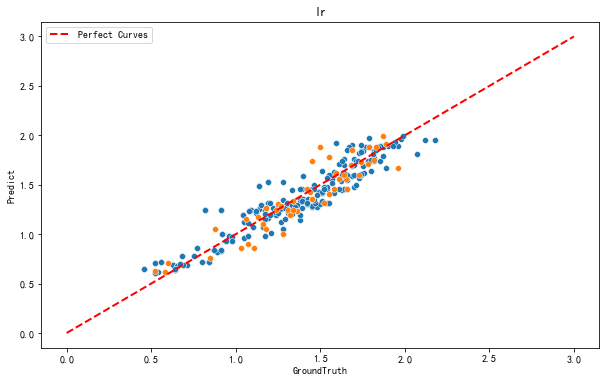

In [7]:
Linear_model = LinearRegression()

model = Model(Linear_model, X_train, X_test, y_train, y_test, 'linear_reg', '4')

visual(model, 'lr', X_train, X_test, y_train, y_test)

linear_reg_tuning train: 
 r2: 0.8959273119906894  rmse: 0.12570119173057018  mse:0.015800789602485567 error_ratio:8.3% mae:0.09638726647321952
linear_reg_tuning test: 
 r2: 0.8321356093516095  rmse: 0.1403418191938315 mse:0.0196958262146341 error_ratio:8.66% mae:0.11168730485494793
save result successful！


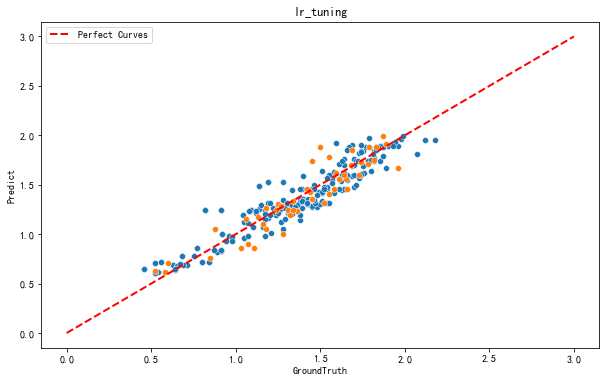

In [8]:
from sklearn.model_selection import GridSearchCV

L_para = {'fit_intercept': [True, False],  
          'normalize': [True, False],       
    
}

L_model = LinearRegression()
L_grid_search = GridSearchCV(L_model,L_para,scoring='neg_mean_squared_error',cv=5)

model = Model(L_grid_search, X_train, X_test, y_train, y_test, 'linear_reg_tuning', '4')

visual(model, 'lr_tuning', X_train, X_test, y_train, y_test)
    

# 4. Lasso

lasso train: 
 r2: 0.5842578897965183  rmse: 0.25123666354131596  mse:0.0631198611073724 error_ratio:18.0% mae:0.1945331492764932
lasso test: 
 r2: 0.6246056279806644  rmse: 0.20987064213437706 mse:0.04404568642989576 error_ratio:14.42% mae:0.16120674752212716
save result successful！


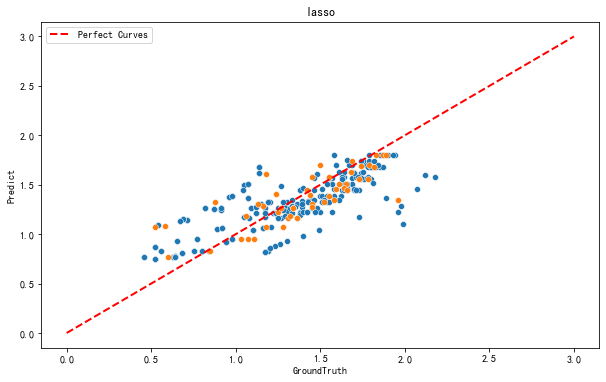

In [3]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(random_state=2024)  # alpha=0.9

model = Model(lasso_model, X_train, X_test, y_train, y_test, 'lasso', '4')

visual(model, 'lasso', X_train, X_test, y_train, y_test)

lasso_tuning train: 
 r2: 0.8468948997606924  rmse: 0.15246348348742939  mse:0.023245113797121655 error_ratio:9.87% mae:0.11365438149963122
lasso_tuning test: 
 r2: 0.7988043955660742  rmse: 0.15364451357635706 mse:0.02360663655211537 error_ratio:10.04% mae:0.12307853103121374
save result successful！


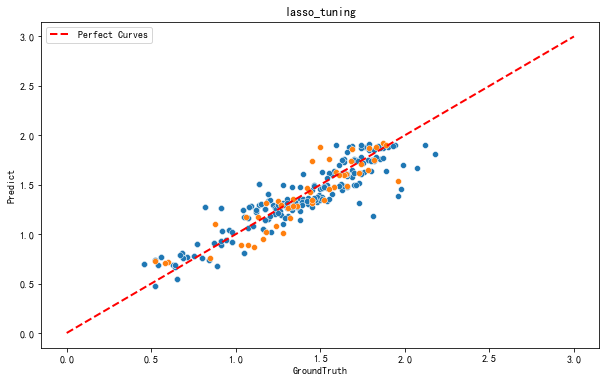

In [4]:
from sklearn.model_selection import GridSearchCV

La_para = {'alpha': [0.001,0.005,0.05],
           'selection': ['cyclic']
}

La_model = Lasso(random_state=2024)
La_grid_search = GridSearchCV(La_model,La_para,scoring='neg_mean_squared_error',cv=5)
La_grid_search.fit(X_train, y_train)



model = Model(La_grid_search, X_train, X_test, y_train, y_test, 'lasso_tuning', '4')

visual(model, 'lasso_tuning', X_train, X_test, y_train, y_test)

# 5. ridge_model

ridge train: 
 r2: 0.8653951548310108  rmse: 0.14295566023563447  mse:0.02043632079340616 error_ratio:9.45% mae:0.10822794009850331
ridge test: 
 r2: 0.8090245054102813  rmse: 0.14969132562036908 mse:0.022407492965983364 error_ratio:10.01% mae:0.12357689521179001
save result successful！


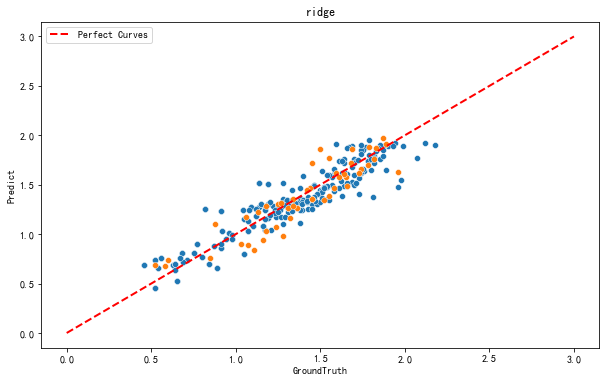

In [5]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(random_state=2024, alpha=5)  # alpha=0.5 

model = Model(ridge_model, X_train, X_test, y_train, y_test, 'ridge', '4')

visual(model, 'ridge', X_train, X_test, y_train, y_test)

ridge_tuning train: 
 r2: 0.8612447514495777  rmse: 0.14514287423834665  mse:0.021066453942168512 error_ratio:9.54% mae:0.10939450280546727
ridge_tuning test: 
 r2: 0.8065106218946387  rmse: 0.15067332667244865 mse:0.022702451370542425 error_ratio:10.02% mae:0.12356829416207538
save result successful！


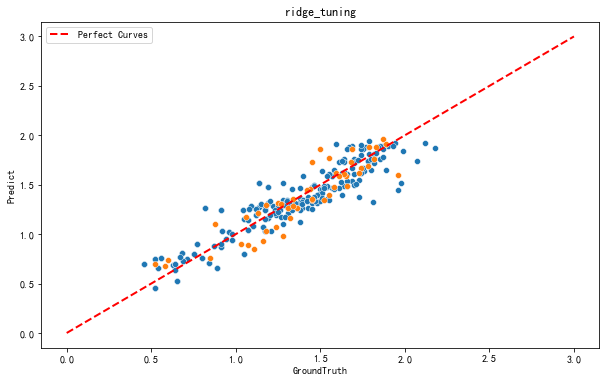

In [6]:
from sklearn.model_selection import GridSearchCV

R_para = {
    'alpha': [0.001, 0.01,0.1,0.5,5,10],  
}

R_model = Ridge(random_state=2024)
R_grid_search = GridSearchCV(R_model,R_para,scoring='neg_mean_squared_error',cv=5)

R_grid_search.fit(X_train, y_train)



model = Model(R_grid_search, X_train, X_test, y_train, y_test, 'ridge_tuning', '4')

visual(model, 'ridge_tuning', X_train, X_test, y_train, y_test)

# 6. svm_model

svm train: 
 r2: 0.8794631000622285  rmse: 0.1352791974440144  mse:0.018300461261096634 error_ratio:8.64% mae:0.1020954805816485
svm test: 
 r2: 0.7925317600234967  rmse: 0.15602120364911332 mse:0.02434261598811809 error_ratio:9.92% mae:0.12490431171119114
save result successful！


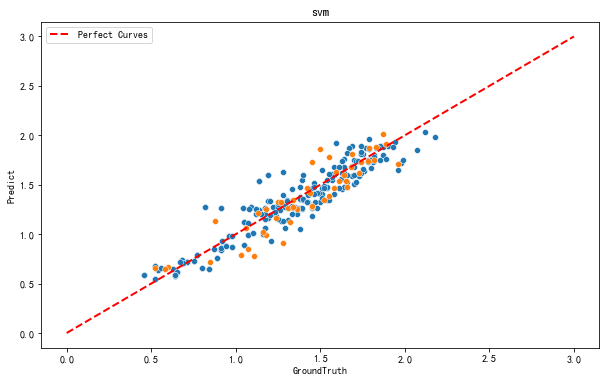

In [13]:
from sklearn import svm
svm_model = svm.SVR(kernel='linear',degree=1,gamma='scale',tol=0.001)

model = Model(svm_model, X_train, X_test, y_train, y_test, 'svm', '4')

visual(model, 'svm', X_train, X_test, y_train, y_test)

svm_tuning train: 
 r2: 0.778506120965675  rmse: 0.18337996003561124  mse:0.03362820974266238 error_ratio:11.82% mae:0.13199183663934716
svm_tuning test: 
 r2: 0.7489791534128241  rmse: 0.1716179490792145 mse:0.02945272044615586 error_ratio:11.51% mae:0.12677319781204674
save result successful！


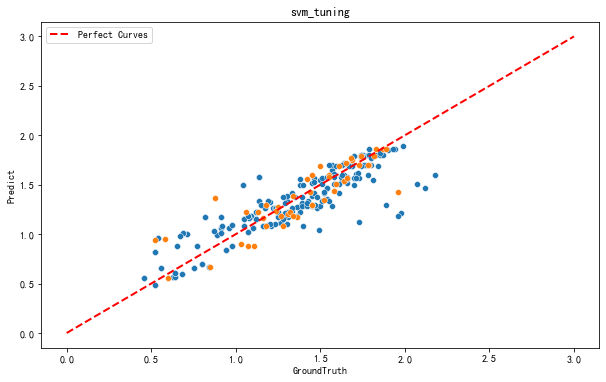

In [14]:
from sklearn.model_selection import GridSearchCV

S_model = svm.SVR()

S_para = {
     'C': [0.1, 1, 10],
    'tol': [0.001, 0.002],
}


S_grid_search = GridSearchCV(S_model,S_para,scoring='neg_mean_squared_error',cv=5)

model = Model(S_grid_search, X_train, X_test, y_train, y_test, 'svm_tuning', '4')


visual(model, 'svm_tuning', X_train, X_test, y_train, y_test)


# 7. elastic net

elastic_net train: 
 r2: 0.6061587746761201  rmse: 0.24452968939221567  mse:0.05979476899425347 error_ratio:17.35% mae:0.18792147696840936
elastic_net test: 
 r2: 0.6434022303752027  rmse: 0.20454888849684447 mse:0.041840247785294514 error_ratio:13.89% mae:0.15466492691877587
save result successful！


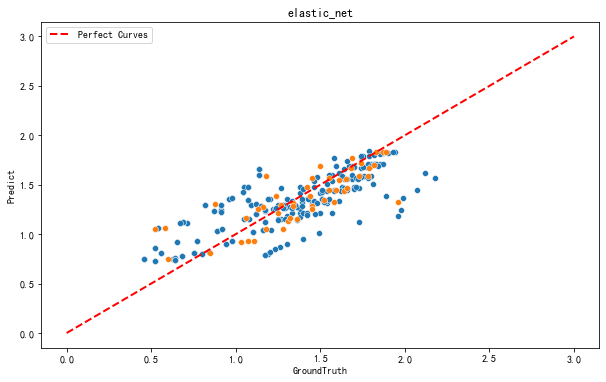

In [7]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet(random_state=2024)   # selection='cyclic'

model = Model(elastic_model, X_train, X_test, y_train, y_test, 'elastic_net', '4')

visual(model, 'elastic_net', X_train, X_test, y_train, y_test)

elastic_net_tuning train: 
 r2: 0.84001148003763  rmse: 0.1558530908813744  mse:0.02429018593727794 error_ratio:10.13% mae:0.1165137628291458
elastic_net_tuning test: 
 r2: 0.7909743248208434  rmse: 0.15660572345353016 mse:0.024525352618403568 error_ratio:10.13% mae:0.12349536967009365
save result successful！


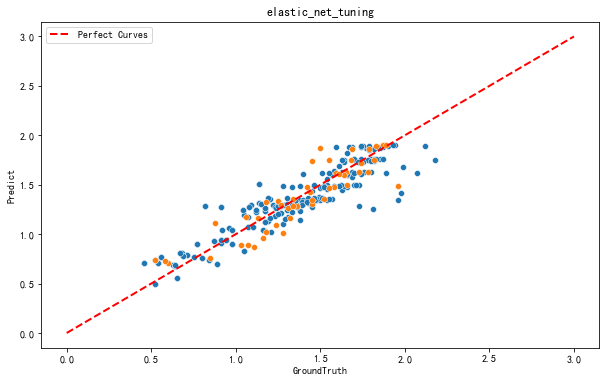

In [8]:
##from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np
from sklearn.model_selection import GridSearchCV




EN_para = {
    'alpha': [0,0.1,0.5,1],          
    'l1_ratio': [0.0001,0.001,0.005,0.05,0.1,0.5,0.9],      
}

EN_model = ElasticNet()
EN_grid_search = GridSearchCV(EN_model,EN_para,scoring='neg_mean_squared_error', cv=5)
# EN_random_search = RandomizedSearchCV(EN_model, EN_para, n_iter=100, scoring='neg_mean_squared_error', cv=5)

EN_grid_search.fit(X_train, y_train)



model = Model(EN_grid_search, X_train, X_test, y_train, y_test, 'elastic_net_tuning', '4')

visual(model, 'elastic_net_tuning', X_train, X_test, y_train, y_test)

# 8. gaussian_process

gaussian train: 
 r2: 0.9257153521467987  rmse: 0.10619902845559955  mse:0.011278233644913243 error_ratio:6.68% mae:0.07875404663249114
gaussian test: 
 r2: 0.8683462853085906  rmse: 0.12428661827215955 mse:0.015447163481529502 error_ratio:7.58% mae:0.09396802913704354
save result successful！


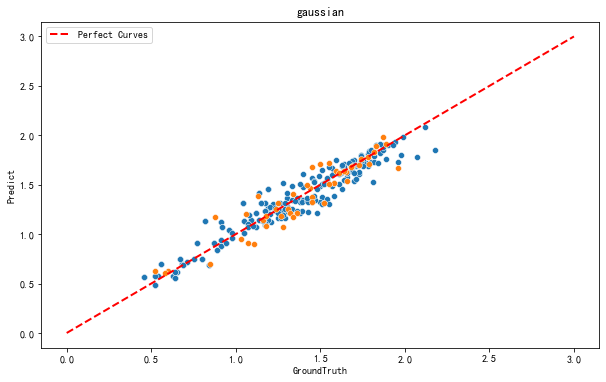

In [17]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.model_selection import GridSearchCV

gaussian_model = GaussianProcessRegressor(kernel = 1.0 * RBF(length_scale=1.0), alpha=0.02, random_state=2024)

model = Model(gaussian_model, X_train, X_test, y_train, y_test, 'gaussian', '4')

visual(model, 'gaussian', X_train, X_test, y_train, y_test)

GaussianProcessRegressor_tuning train: 
 r2: 0.9217070444954251  rmse: 0.10195525654545497  mse:0.010394874337249537 error_ratio:6.39% mae:0.07666782451870627
GaussianProcessRegressor_tuning test: 
 r2: 0.8637046915177058  rmse: 0.1278227812849416 mse:0.016338663415418016 error_ratio:7.31% mae:0.09538032787031164
save result successful！


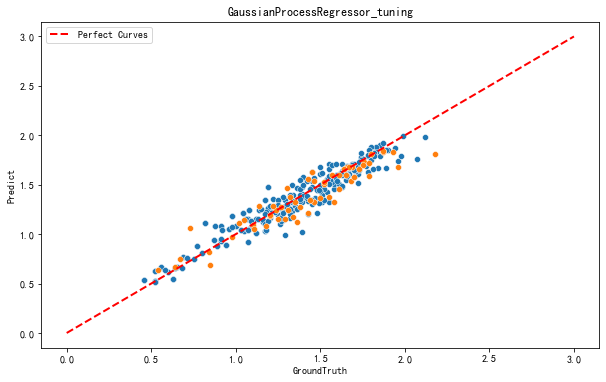

In [12]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.model_selection import GridSearchCV


kernel_1 = 1 * RBF(length_scale=1)
kernel_2 = 1.0 * Matern(length_scale=1.0, nu=1.5)

GS_grid = {
    "kernel": [kernel_1],
    "alpha": [0.01,0.02,0.03],
#     "n_restarts_optimizer": [1],
    'random_state':[2024],
}


gpr = GaussianProcessRegressor()

GS_grid_search = GridSearchCV(gpr, GS_grid, scoring='neg_mean_squared_error', cv=5)

model = Model(GS_grid_search, X_train, X_test, y_train, y_test, 'GaussianProcessRegressor_tuning', '6')

visual(model, 'GaussianProcessRegressor_tuning', X_train, X_test, y_train, y_test)

# 9. KNN

knn train: 
 r2: 0.8628792297542266  rmse: 0.14428548090504462  mse:0.020818299999999994 error_ratio:7.55% mae:0.09099999999999998
knn test: 
 r2: 0.7146893824047726  rmse: 0.1829644774266306 mse:0.03347600000000002 error_ratio:11.07% mae:0.134
save result successful！


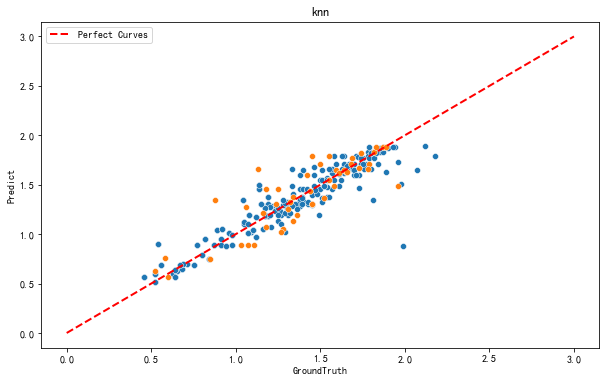

In [9]:
from sklearn.neighbors import KNeighborsRegressor

KNeighbors_model = KNeighborsRegressor()

model = Model(KNeighbors_model, X_train, X_test, y_train, y_test, 'knn', '4')

visual(model, 'knn', X_train, X_test, y_train, y_test)

knn_tuning train: 
 r2: 0.9192981267303415  rmse: 0.11069112901071461  mse:0.012252526041666666 error_ratio:6.26% mae:0.07721875000000002
knn_tuning test: 
 r2: 0.751452656063424  rmse: 0.17077031357938066 mse:0.029162500000000008 error_ratio:10.01% mae:0.12760416666666666
save result successful！


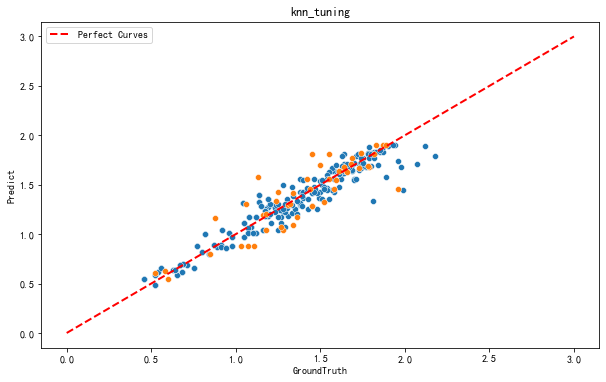

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.model_selection import GridSearchCV

knn_grid = {
    'n_neighbors': [3,4,5],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan']
    'p': [1, 2],
}


knn = KNeighborsRegressor()

knn_grid_search = GridSearchCV(knn, knn_grid, scoring='neg_mean_squared_error', cv=5)

knn_grid_search.fit(X_train, y_train)


model = Model(knn_grid_search, X_train, X_test, y_train, y_test, 'knn_tuning', '4')

visual(model, 'knn_tuning', X_train, X_test, y_train, y_test)


In [20]:
KNeighborsRegressor?

# 10.XGBoost 

XGBoost train: 
 r2: 0.9999348515412904  rmse: 0.0031450176134185707  mse:9.891135788713043e-06 error_ratio:0.17% mae:0.002214974482854209
XGBoost test: 
 r2: 0.9250543506372592  rmse: 0.09377369437099332 mse:0.008793505755984464 error_ratio:5.22% mae:0.06072669302423795
save result successful！


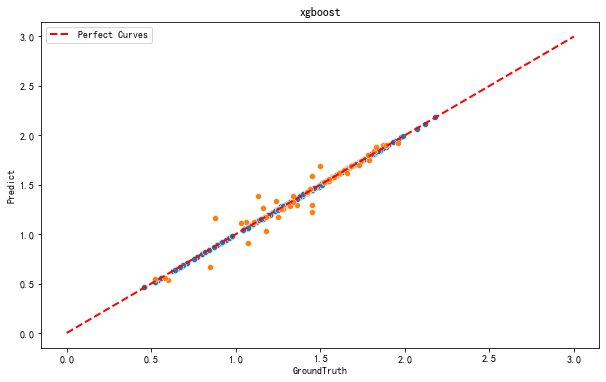

In [21]:
import xgboost as xgb
from xgboost import XGBRegressor

XGBoost_model = XGBRegressor(random_state=2024)

model = Model(XGBoost_model, X_train, X_test, y_train, y_test, 'XGBoost', '4')

# 可视化
visual(model, 'xgboost', X_train, X_test, y_train, y_test)

XGBoost_tuning train: 
 r2: 0.9924311157247272  rmse: 0.0338990042795468  mse:0.0011491424911447322 error_ratio:2.05% mae:0.0256052762567997
XGBoost_tuning test: 
 r2: 0.9257484184666936  rmse: 0.09333846767800759 mse:0.008712069548478467 error_ratio:4.95% mae:0.06199519470334053
save result successful！


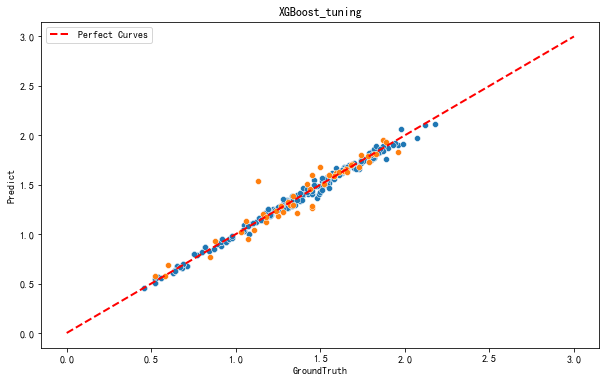

In [11]:
#预测出 Co01
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
X_grid = {
 'n_estimators': [20,30,40],
    'max_depth': [2,3,4],
    'random_state':[2024],
    'subsample': [0.7,0.75],
    'reg_alpha': [0.1,0.2],
#     'reg_lambda': [0.1],
#     'colsample_bytree': [0.]
    
}

X_model = XGBRegressor()

X_grid_search = GridSearchCV(X_model,X_grid,scoring='neg_mean_squared_error',cv=5)

X_grid_search.fit(X_train, y_train)



model = Model(X_grid_search, X_train, X_test, y_train, y_test, 'XGBoost_tuning', '4')

# 可视化
visual(model, 'XGBoost_tuning', X_train, X_test, y_train, y_test)

In [4]:
save_model(X_grid_search, 'XGBoost_tuning_4')

save XGBoost_tuning_4 model successful
